### PRCP- 1001- RiceLeaf disease detection

Rice plant is susceptible to diseases that may affect the quantity and quality of rice production. Detection of these diseases by the farmers will require a great knowledge about the various disease and how to identify them visually. Monitoring these diseases, their occurrences and frequencies are very important for early detection of the affected plants, their timely treatment, and most importantly, for planning future strategies to prevent the diseases to minimize the losses.
CNN is an algorithm of deep learning techniques that has been successfully invoked for handling computer vision issues such as picture classification, object segmentation, and image analysis. CNN has been used to address the classification of Rice leaf diseases accurate detection and classification of rice leaf disease.

The dataset provided contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
Classes

* **Leaf smut**: small black linear lesions on leaf blades, leaf
tips may turn grey and dry.

* **Bacterial blight**: elongated lesions near the leaf tips and
margins, and turns white to yellow and then grey due to
fungal attack.

* **Brown spot**: 
    dark brown colored and round to oval shaped lesions on rice leaves.

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt

import cv2

import os

In [ ]:
import tensorflow as  tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Lambda
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.models import Model  
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
#import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Reading The Images

In [ ]:
#Give dataset path
train_path = 'C:/Users/ASUS/Downloads/DataMites Interenship Project/Rice Leaf Using CNN/Data/train'
test_path = 'C:/Users/ASUS/Downloads/DataMites Interenship Project/Rice Leaf Using CNN/Data/test'

In [ ]:
# useful for getting number of classes
train_folders = glob('C:/Users/ASUS/Downloads/DataMites Interenship Project/Rice Leaf Using CNN/Data/train/*')
print(len(train_folders))

3


In [ ]:
# useful for getting number of classes
test_folders = glob('C:/Users/ASUS/Downloads/DataMites Interenship Project/Rice Leaf Using CNN/Data/test/*')
print(len(test_folders))

3


### 1. Bacterial Leaf Blight

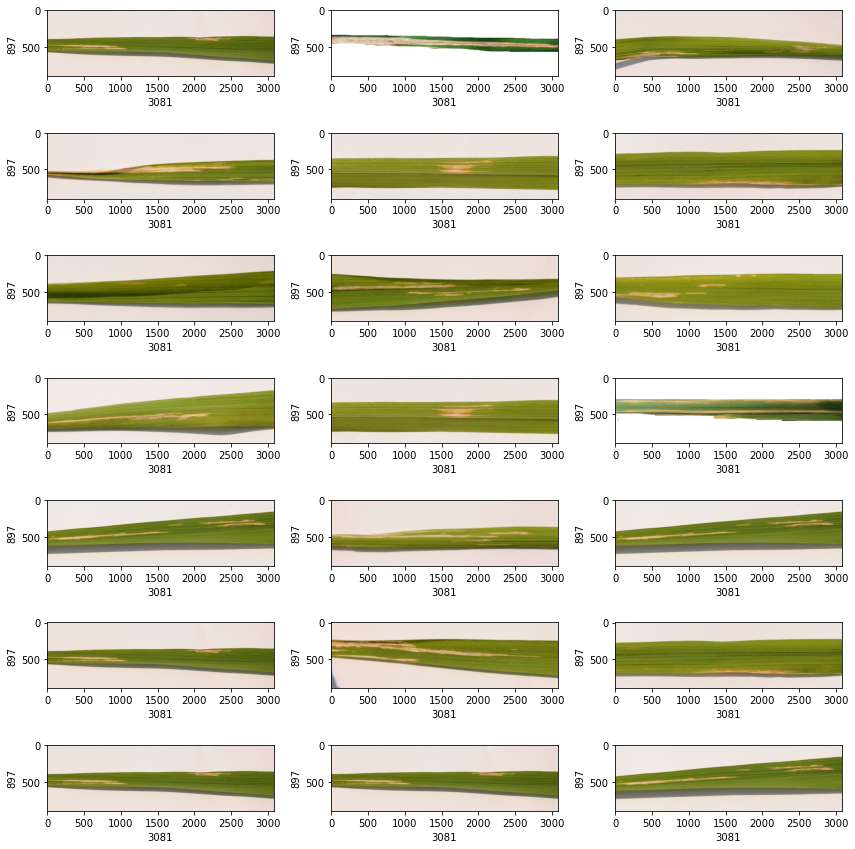

In [ ]:
plt.figure(figsize = (12, 12))
bacteria_path = train_path + '/Bacterial leaf blight'

for i in range(1, 22):
    plt.subplot(7, 3, i)
    plt.tight_layout()
    rand_img = plt.imread(bacteria_path +'/'+ random.choice(sorted(os.listdir(bacteria_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### 2. Brown Spot Images

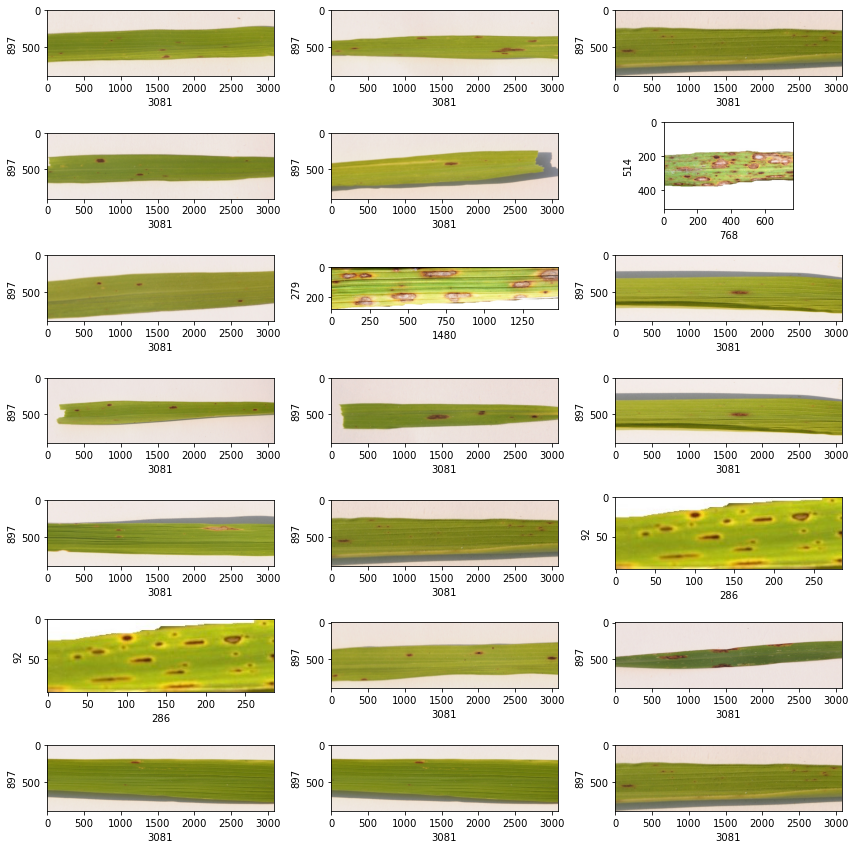

In [ ]:
plt.figure(figsize=(12,12))
brown_path = train_path + '/Brown spot'
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = plt.imread(brown_path +'/'+ random.choice(sorted(os.listdir(brown_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image 

### 3. Leaf Smut Images

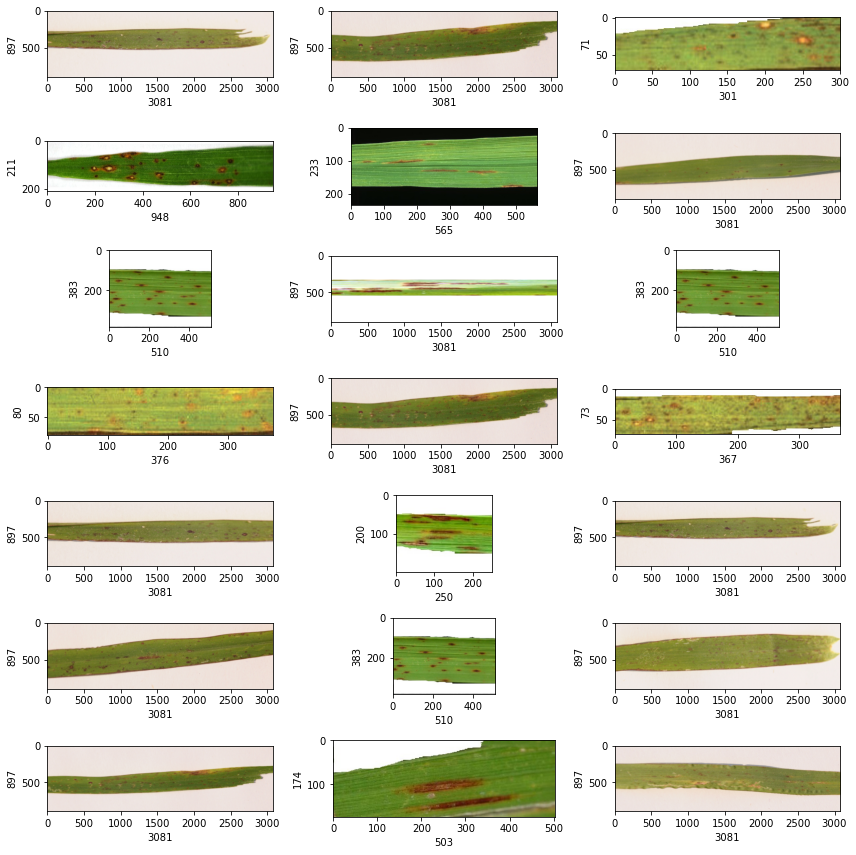

In [ ]:
plt.figure(figsize=(12,12))
leaf_smut_path = train_path + '/Leaf Smut'
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = plt.imread(leaf_smut_path +'/'+ random.choice(sorted(os.listdir(leaf_smut_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (256, 256),
  batch_size = 17)

Found 84 files belonging to 3 classes.
Using 68 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (256, 256),
  batch_size = 4)

Found 84 files belonging to 3 classes.
Using 16 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


**take(1) is referring to the 1st batch of train_ds.For example, If you have defined your batch size as 32. Then the length of train_ds. take(1) will be 32.**

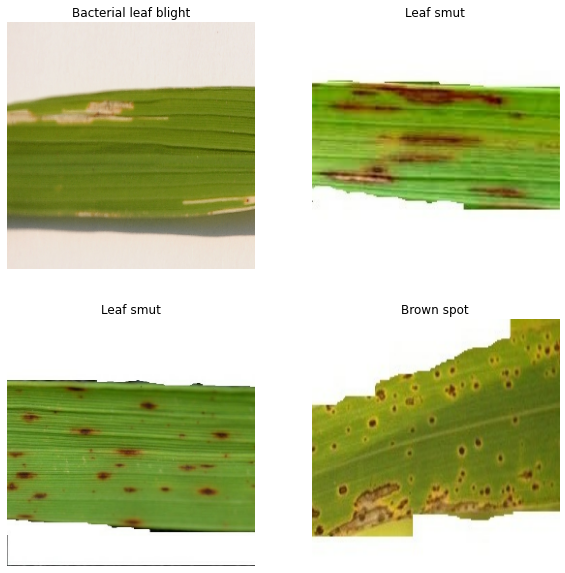

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(17):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

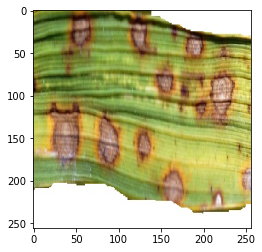

In [ ]:
# Reading the image
from keras.utils import load_img, img_to_array
file = train_path + '/Brown spot/DSC_0106.jpg'
img = load_img(file, target_size = (256,256))
img = np.asarray(img)
plt.imshow(img)

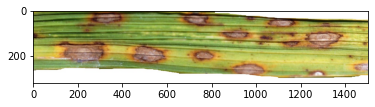

In [ ]:
imre = plt.imread(file)
img1 = plt.imshow(imre)

In [ ]:
## dimension of image
## img.shape --> returns height, width and number of channels(number of components used to represent each pixel)
imre.shape

(323, 1504, 3)

In [ ]:
## reshaping image
cv2.resize(imre, (256, 256)).shape

(256, 256, 3)

## Building the Convolution Neural Network Model

In [ ]:
#Initialising the CNN model
model = Sequential([
    # First Convolution Layer
    Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape=(256, 256, 3)),
    # First Pooling Layer
    MaxPooling2D(),
    # Second Convolution Layer
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    # Second Pooling Layer
    MaxPooling2D(),
    # Third Convolution Layer
    Conv2D(64, 3, padding = 'same', activation = 'relu'),
    # Third Pooling Layer
    MaxPooling2D(),
    # Fourth Convolution Layer
    Conv2D(128, 3, padding = 'same', activation = 'relu'),
    # Fourth Pooling Layer
    MaxPooling2D(),
    # Fifth Convolution Layer
    Conv2D(256, 3, padding = 'same', activation = 'relu'),
    # Fifth Pooling Layer
    MaxPooling2D(),
    # Sixth Convolution Layer
    Conv2D(512, 3, padding = 'same', activation = 'relu'),
    # Sixth Pooling Layer
    MaxPooling2D(),
    # Flattening
    Flatten(),
    # Fully Connected Layer
    Dense(700, activation = 'relu'),
    Dropout(0.4), # Deactivating 40% neurons
    Dense(3, activation = 'softmax')
])

In [ ]:
## Layers
model.layers

In [ ]:
## Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

## Training the CNN Model

### Compiling the CNN Model

In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(optimizer = Adam(lr = 0.0001),
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])      

### Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.0,
    rescale = 1./255,
    )

In [ ]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    validation_split = 0.0,
    rescale = 1./255,
    )

## Training the CNN Model

In [ ]:
height = 256
width = 256
batch_size = 32
img_size = (height, width)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = img_size,
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',)
                                              # subset = 'training')

Found 84 images belonging to 3 classes.


In [ ]:
val_set = test_datagen.flow_from_directory(test_path,
                                            target_size = img_size,
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',)
                                            # subset = 'validation')

Found 36 images belonging to 3 classes.


In [ ]:
epochs = 500

**validation_steps** :-

only if the validation_data is a generator then only this argument
can be used. It specifies the total number of steps taken from the generator before it is 
stopped at every epoch and its value is calculated as the total number of validation data points
in your dataset divided by the validation batch size

**steps_per_epoch** :-

it specifies the total number of steps taken from the generator as soon as one epoch is finished and next epoch has started. We can calculate the value of steps_per_epoch as the total number of samples in your dataset divided by the batch size.

In [ ]:
# Validation Steps
STEP_SIZE_TRAIN = train_set.n // train_set.batch_size

# Steps per Epoch
STEP_SIZE_VALID = val_set.n // val_set.batch_size

In [ ]:
STEP_SIZE_VALID

1

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath = 'rice_leaf.h5',
                               verbose = 1,
                               save_best_only = True)


# epoch = 100
start = datetime.now()

hist = model.fit(train_set,
                 epochs = epochs,
                 verbose = 1,
                 steps_per_epoch = STEP_SIZE_TRAIN,
                 validation_steps = STEP_SIZE_VALID,
                 callbacks = [checkpointer],
                 validation_data = val_set)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 1.1050 - accuracy: 0.3654
Epoch 1: val_loss improved from inf to 1.10415, saving model to rice_leaf.h5
2/2 [==============================] - 12s 8s/step - loss: 1.1050 - accuracy: 0.3654 - val_loss: 1.1041 - val_accuracy: 0.3125
Epoch 2/500
2/2 [==============================] - ETA: 0s - loss: 1.1069 - accuracy: 0.3438
Epoch 2: val_loss improved from 1.10415 to 1.09833, saving model to rice_leaf.h5
2/2 [==============================] - 9s 5s/step - loss: 1.1069 - accuracy: 0.3438 - val_loss: 1.0983 - val_accuracy: 0.3438
Epoch 3/500
2/2 [==============================] - ETA: 0s - loss: 1.1027 - accuracy: 0.3281
Epoch 3: val_loss improved from 1.09833 to 1.09680, saving model to rice_leaf.h5
2/2 [==============================] - 9s 6s/step - loss: 1.1027 - accuracy: 0.3281 - val_loss: 1.0968 - val_accuracy: 0.3438
Epoch 4/500
2/2 [==============================] - ETA: 0s - loss: 1.1014 - accuracy: 0.3462
Epoch 4: v

Epoch 29/500
2/2 [==============================] - ETA: 0s - loss: 1.0186 - accuracy: 0.3750
Epoch 29: val_loss did not improve from 0.97643
2/2 [==============================] - 8s 4s/step - loss: 1.0186 - accuracy: 0.3750 - val_loss: 1.0245 - val_accuracy: 0.4375
Epoch 30/500
2/2 [==============================] - ETA: 0s - loss: 0.8918 - accuracy: 0.5577
Epoch 30: val_loss did not improve from 0.97643
2/2 [==============================] - 7s 5s/step - loss: 0.8918 - accuracy: 0.5577 - val_loss: 1.0081 - val_accuracy: 0.5625
Epoch 31/500
2/2 [==============================] - ETA: 0s - loss: 1.0374 - accuracy: 0.5192
Epoch 31: val_loss did not improve from 0.97643
2/2 [==============================] - 7s 5s/step - loss: 1.0374 - accuracy: 0.5192 - val_loss: 1.0278 - val_accuracy: 0.5000
Epoch 32/500
2/2 [==============================] - ETA: 0s - loss: 0.9809 - accuracy: 0.5192
Epoch 32: val_loss did not improve from 0.97643
2/2 [==============================] - 7s 5s/step - lo

Epoch 59/500
2/2 [==============================] - ETA: 0s - loss: 0.7157 - accuracy: 0.6731
Epoch 59: val_loss did not improve from 0.68800
2/2 [==============================] - 7s 4s/step - loss: 0.7157 - accuracy: 0.6731 - val_loss: 0.8214 - val_accuracy: 0.7188
Epoch 60/500
2/2 [==============================] - ETA: 0s - loss: 0.7207 - accuracy: 0.6875
Epoch 60: val_loss did not improve from 0.68800
2/2 [==============================] - 8s 4s/step - loss: 0.7207 - accuracy: 0.6875 - val_loss: 0.7624 - val_accuracy: 0.6562
Epoch 61/500
2/2 [==============================] - ETA: 0s - loss: 0.7306 - accuracy: 0.6346
Epoch 61: val_loss did not improve from 0.68800
2/2 [==============================] - 7s 4s/step - loss: 0.7306 - accuracy: 0.6346 - val_loss: 0.7628 - val_accuracy: 0.6875
Epoch 62/500
2/2 [==============================] - ETA: 0s - loss: 0.7519 - accuracy: 0.5577
Epoch 62: val_loss did not improve from 0.68800
2/2 [==============================] - 7s 3s/step - lo

2/2 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.7188
Epoch 119: val_loss did not improve from 0.51866
2/2 [==============================] - 8s 5s/step - loss: 0.5234 - accuracy: 0.7188 - val_loss: 0.6339 - val_accuracy: 0.8125
Epoch 120/500
2/2 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.7692
Epoch 120: val_loss did not improve from 0.51866
2/2 [==============================] - 9s 5s/step - loss: 0.4596 - accuracy: 0.7692 - val_loss: 0.8108 - val_accuracy: 0.8125
Epoch 121/500
2/2 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.6923
Epoch 121: val_loss did not improve from 0.51866
2/2 [==============================] - 9s 6s/step - loss: 0.5420 - accuracy: 0.6923 - val_loss: 0.5211 - val_accuracy: 0.7812
Epoch 122/500
2/2 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.8269
Epoch 122: val_loss did not improve from 0.51866
2/2 [==============================] - 8s 4s/step - loss: 0.

2/2 [==============================] - 8s 4s/step - loss: 0.3217 - accuracy: 0.9038 - val_loss: 0.8533 - val_accuracy: 0.7188
Epoch 150/500
2/2 [==============================] - ETA: 0s - loss: 0.3218 - accuracy: 0.8750
Epoch 150: val_loss did not improve from 0.51866
2/2 [==============================] - 9s 5s/step - loss: 0.3218 - accuracy: 0.8750 - val_loss: 0.9809 - val_accuracy: 0.7500
Epoch 151/500
2/2 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8462
Epoch 151: val_loss did not improve from 0.51866
2/2 [==============================] - 10s 7s/step - loss: 0.3051 - accuracy: 0.8462 - val_loss: 0.9841 - val_accuracy: 0.7500
Epoch 152/500
2/2 [==============================] - ETA: 0s - loss: 0.3897 - accuracy: 0.7969
Epoch 152: val_loss did not improve from 0.51866
2/2 [==============================] - 14s 10s/step - loss: 0.3897 - accuracy: 0.7969 - val_loss: 1.0218 - val_accuracy: 0.7812
Epoch 153/500
2/2 [==============================] - ETA: 0s 

Epoch 180/500
2/2 [==============================] - ETA: 0s - loss: 0.2378 - accuracy: 0.9231
Epoch 180: val_loss did not improve from 0.46209
2/2 [==============================] - 8s 6s/step - loss: 0.2378 - accuracy: 0.9231 - val_loss: 1.1877 - val_accuracy: 0.6562
Epoch 181/500
2/2 [==============================] - ETA: 0s - loss: 0.3033 - accuracy: 0.9219
Epoch 181: val_loss did not improve from 0.46209
2/2 [==============================] - 8s 5s/step - loss: 0.3033 - accuracy: 0.9219 - val_loss: 1.2704 - val_accuracy: 0.7500
Epoch 182/500
2/2 [==============================] - ETA: 0s - loss: 0.2694 - accuracy: 0.8906
Epoch 182: val_loss did not improve from 0.46209
2/2 [==============================] - 9s 5s/step - loss: 0.2694 - accuracy: 0.8906 - val_loss: 1.2702 - val_accuracy: 0.7500
Epoch 183/500
2/2 [==============================] - ETA: 0s - loss: 0.2906 - accuracy: 0.8846
Epoch 183: val_loss did not improve from 0.46209
2/2 [==============================] - 7s 4s/s

2/2 [==============================] - ETA: 0s - loss: 0.1941 - accuracy: 0.9231
Epoch 240: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 4s/step - loss: 0.1941 - accuracy: 0.9231 - val_loss: 0.4751 - val_accuracy: 0.9062
Epoch 241/500
2/2 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9231
Epoch 241: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 4s/step - loss: 0.2117 - accuracy: 0.9231 - val_loss: 0.6144 - val_accuracy: 0.8438
Epoch 242/500
2/2 [==============================] - ETA: 0s - loss: 0.1783 - accuracy: 0.9038
Epoch 242: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 4s/step - loss: 0.1783 - accuracy: 0.9038 - val_loss: 1.0308 - val_accuracy: 0.8438
Epoch 243/500
2/2 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9231
Epoch 243: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 4s/step - loss: 0.

2/2 [==============================] - 8s 6s/step - loss: 0.1093 - accuracy: 0.9808 - val_loss: 1.4080 - val_accuracy: 0.7812
Epoch 271/500
2/2 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9531
Epoch 271: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 5s/step - loss: 0.1211 - accuracy: 0.9531 - val_loss: 1.7511 - val_accuracy: 0.8125
Epoch 272/500
2/2 [==============================] - ETA: 0s - loss: 0.1172 - accuracy: 0.9688
Epoch 272: val_loss did not improve from 0.33029
2/2 [==============================] - 9s 5s/step - loss: 0.1172 - accuracy: 0.9688 - val_loss: 1.5917 - val_accuracy: 0.8438
Epoch 273/500
2/2 [==============================] - ETA: 0s - loss: 0.1936 - accuracy: 0.9038
Epoch 273: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 5s/step - loss: 0.1936 - accuracy: 0.9038 - val_loss: 1.6837 - val_accuracy: 0.8438
Epoch 274/500
2/2 [==============================] - ETA: 0s - l

Epoch 301/500
2/2 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.9615
Epoch 301: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 5s/step - loss: 0.1523 - accuracy: 0.9615 - val_loss: 0.9600 - val_accuracy: 0.7500
Epoch 302/500
2/2 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9808
Epoch 302: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 5s/step - loss: 0.1353 - accuracy: 0.9808 - val_loss: 1.2627 - val_accuracy: 0.8125
Epoch 303/500
2/2 [==============================] - ETA: 0s - loss: 0.1615 - accuracy: 0.9219
Epoch 303: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 4s/step - loss: 0.1615 - accuracy: 0.9219 - val_loss: 1.5022 - val_accuracy: 0.8125
Epoch 304/500
2/2 [==============================] - ETA: 0s - loss: 0.1707 - accuracy: 0.9231
Epoch 304: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 5s/s

2/2 [==============================] - 7s 5s/step - loss: 0.2155 - accuracy: 0.9038 - val_loss: 1.5569 - val_accuracy: 0.7812
Epoch 362/500
2/2 [==============================] - ETA: 0s - loss: 0.3717 - accuracy: 0.8654
Epoch 362: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 5s/step - loss: 0.3717 - accuracy: 0.8654 - val_loss: 1.1764 - val_accuracy: 0.8438
Epoch 363/500
2/2 [==============================] - ETA: 0s - loss: 0.2208 - accuracy: 0.8654
Epoch 363: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 4s/step - loss: 0.2208 - accuracy: 0.8654 - val_loss: 0.7456 - val_accuracy: 0.8750
Epoch 364/500
2/2 [==============================] - ETA: 0s - loss: 0.1479 - accuracy: 0.9423
Epoch 364: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 5s/step - loss: 0.1479 - accuracy: 0.9423 - val_loss: 0.4225 - val_accuracy: 0.7500
Epoch 365/500
2/2 [==============================] - ETA: 0s - l

Epoch 392/500
2/2 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9615
Epoch 392: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 4s/step - loss: 0.1079 - accuracy: 0.9615 - val_loss: 1.3937 - val_accuracy: 0.8438
Epoch 393/500
2/2 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9808
Epoch 393: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 5s/step - loss: 0.0667 - accuracy: 0.9808 - val_loss: 1.1784 - val_accuracy: 0.8438
Epoch 394/500
2/2 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9808
Epoch 394: val_loss did not improve from 0.33029
2/2 [==============================] - 7s 5s/step - loss: 0.1076 - accuracy: 0.9808 - val_loss: 1.1840 - val_accuracy: 0.8750
Epoch 395/500
2/2 [==============================] - ETA: 0s - loss: 0.1419 - accuracy: 0.9531
Epoch 395: val_loss did not improve from 0.33029
2/2 [==============================] - 9s 5s/s

2/2 [==============================] - 8s 4s/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 1.4944 - val_accuracy: 0.8750
Epoch 453/500
2/2 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 1.0000
Epoch 453: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 4s/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 1.1518 - val_accuracy: 0.8750
Epoch 454/500
2/2 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9423
Epoch 454: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 5s/step - loss: 0.0776 - accuracy: 0.9423 - val_loss: 1.3561 - val_accuracy: 0.8438
Epoch 455/500
2/2 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9808
Epoch 455: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 6s/step - loss: 0.0444 - accuracy: 0.9808 - val_loss: 1.5838 - val_accuracy: 0.8125
Epoch 456/500
2/2 [==============================] - ETA: 0s - l

Epoch 483/500
2/2 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9808
Epoch 483: val_loss did not improve from 0.33029
2/2 [==============================] - 9s 6s/step - loss: 0.0421 - accuracy: 0.9808 - val_loss: 1.8737 - val_accuracy: 0.8438
Epoch 484/500
2/2 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 1.0000
Epoch 484: val_loss did not improve from 0.33029
2/2 [==============================] - 9s 4s/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 1.0760 - val_accuracy: 0.8750
Epoch 485/500
2/2 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 1.0000
Epoch 485: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 6s/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 1.0689 - val_accuracy: 0.8750
Epoch 486/500
2/2 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 1.0000
Epoch 486: val_loss did not improve from 0.33029
2/2 [==============================] - 8s 4s/s

### Checking the Test Accuracy

In [ ]:
score = model.evaluate(val_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 2s 91ms/step - loss: 1.8440 - accuracy: 0.8611
Test Loss: 1.8440200090408325
Test accuracy: 0.8611111044883728


In [ ]:
score

[1.8440200090408325, 0.8611111044883728]

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Training Vs Validation Plot

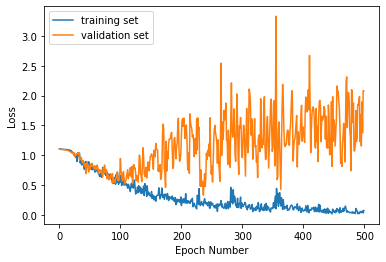

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label = 'training set')
plt.plot(hist.history['val_loss'], label = 'validation set')
plt.legend()

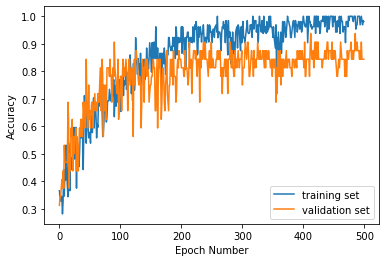

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label = 'training set')
plt.plot(hist.history['val_accuracy'], label = 'validation set')
plt.legend()

In [ ]:
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
# Load the model
from keras import models
saved_model = models.load_model("rice_leaf.h5")

In [ ]:
score_saved_model = saved_model.evaluate(val_set)
print('Test Loss:', score_saved_model[0])
print('Test accuracy:', score_saved_model[1])

2/2 [==============================] - 2s 95ms/step - loss: 0.5382 - accuracy: 0.8611
Test Loss: 0.5382072925567627
Test accuracy: 0.8611111044883728


In [ ]:
def predict_image(filename, model):
    img_ = load_img(filename, target_size=(256, 256))
    img_array = img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(class_names[index]).title()), size = 18, color='blue')
    plt.imshow(img_array)

1/1 [==============================] - 0s 486ms/step


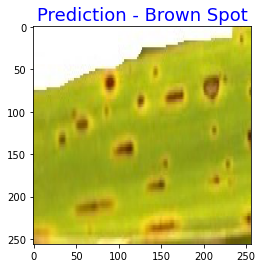

In [ ]:
predict_image('DSC_0115.jpg', saved_model)

### CNN with RMSProp optimizer

In [ ]:
#Initialising the CNN model
rms_model = Sequential([
    # First Convolution Layer
    Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape=(256, 256, 3)),
    # First Pooling Layer
    MaxPooling2D(),
    # Second Convolution Layer
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    # Second Pooling Layer
    MaxPooling2D(),
    # Third Convolution Layer
    Conv2D(64, 3, padding = 'same', activation = 'relu'),
    # Third Pooling Layer
    MaxPooling2D(),
    # dropout layer to overcome of overfitting 
    Dropout(0.3), # drop 30% info
    # Flattening
    Flatten(),
    # Fully Connected Layer
    Dense(100, activation = 'relu'),
    # Deactivating 40% of neuron
    Dropout(0.4),
    Dense(3, activation = 'softmax')
])

In [ ]:
## Layers
rms_model.layers

In [ ]:
## Summary
rms_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)      

In [ ]:
from keras.optimizers import RMSprop

In [ ]:
rms_model.compile(optimizer = 'rmsprop',
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])      

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint   

# train the model
rms_checkpointer = ModelCheckpoint(filepath = 'riceleaf_RMS.h5',
                               verbose = 1,
                               save_best_only = True)



start = datetime.now()

RMS_hist = rms_model.fit(train_set,
                 epochs = epochs,
                 verbose = 1,
                 steps_per_epoch = STEP_SIZE_TRAIN,
                 validation_steps = STEP_SIZE_VALID,
                 callbacks = [rms_checkpointer],
                 validation_data = val_set)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 1.1218 - accuracy: 0.3125
Epoch 1: val_loss improved from inf to 1.10824, saving model to riceleaf_RMS.h5
2/2 [==============================] - 13s 7s/step - loss: 1.1218 - accuracy: 0.3125 - val_loss: 1.1082 - val_accuracy: 0.3438
Epoch 2/500
2/2 [==============================] - ETA: 0s - loss: 1.1230 - accuracy: 0.3077
Epoch 2: val_loss improved from 1.10824 to 1.09667, saving model to riceleaf_RMS.h5
2/2 [==============================] - 9s 6s/step - loss: 1.1230 - accuracy: 0.3077 - val_loss: 1.0967 - val_accuracy: 0.3438
Epoch 3/500
2/2 [==============================] - ETA: 0s - loss: 1.0952 - accuracy: 0.3846
Epoch 3: val_loss did not improve from 1.09667
2/2 [==============================] - 8s 4s/step - loss: 1.0952 - accuracy: 0.3846 - val_loss: 1.1011 - val_accuracy: 0.3125
Epoch 4/500
2/2 [==============================] - ETA: 0s - loss: 1.0965 - accuracy: 0.3654
Epoch 4: val_loss did not improve from

2/2 [==============================] - ETA: 0s - loss: 0.9034 - accuracy: 0.5577
Epoch 61: val_loss improved from 1.04417 to 1.03426, saving model to riceleaf_RMS.h5
2/2 [==============================] - 8s 4s/step - loss: 0.9034 - accuracy: 0.5577 - val_loss: 1.0343 - val_accuracy: 0.5938
Epoch 62/500
2/2 [==============================] - ETA: 0s - loss: 0.8624 - accuracy: 0.5938
Epoch 62: val_loss improved from 1.03426 to 1.02822, saving model to riceleaf_RMS.h5
2/2 [==============================] - 10s 7s/step - loss: 0.8624 - accuracy: 0.5938 - val_loss: 1.0282 - val_accuracy: 0.5312
Epoch 63/500
2/2 [==============================] - ETA: 0s - loss: 0.7630 - accuracy: 0.6719
Epoch 63: val_loss did not improve from 1.02822
2/2 [==============================] - 9s 5s/step - loss: 0.7630 - accuracy: 0.6719 - val_loss: 1.1716 - val_accuracy: 0.5312
Epoch 64/500
2/2 [==============================] - ETA: 0s - loss: 0.8063 - accuracy: 0.6094
Epoch 64: val_loss did not improve from 

Epoch 91/500
2/2 [==============================] - ETA: 0s - loss: 0.8225 - accuracy: 0.5385
Epoch 91: val_loss did not improve from 0.85265
2/2 [==============================] - 8s 5s/step - loss: 0.8225 - accuracy: 0.5385 - val_loss: 1.5319 - val_accuracy: 0.7500
Epoch 92/500
2/2 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.6154
Epoch 92: val_loss did not improve from 0.85265
2/2 [==============================] - 10s 4s/step - loss: 0.6923 - accuracy: 0.6154 - val_loss: 1.3768 - val_accuracy: 0.5938
Epoch 93/500
2/2 [==============================] - ETA: 0s - loss: 0.7827 - accuracy: 0.6346
Epoch 93: val_loss did not improve from 0.85265
2/2 [==============================] - 10s 6s/step - loss: 0.7827 - accuracy: 0.6346 - val_loss: 1.2426 - val_accuracy: 0.8125
Epoch 94/500
2/2 [==============================] - ETA: 0s - loss: 0.7060 - accuracy: 0.7500
Epoch 94: val_loss did not improve from 0.85265
2/2 [==============================] - 12s 5s/step -

2/2 [==============================] - ETA: 0s - loss: 0.5963 - accuracy: 0.7115
Epoch 151: val_loss did not improve from 0.64229
2/2 [==============================] - 10s 7s/step - loss: 0.5963 - accuracy: 0.7115 - val_loss: 1.2920 - val_accuracy: 0.8438
Epoch 152/500
2/2 [==============================] - ETA: 0s - loss: 0.3484 - accuracy: 0.9231
Epoch 152: val_loss did not improve from 0.64229
2/2 [==============================] - 12s 5s/step - loss: 0.3484 - accuracy: 0.9231 - val_loss: 1.5150 - val_accuracy: 0.8125
Epoch 153/500
2/2 [==============================] - ETA: 0s - loss: 0.5894 - accuracy: 0.6731
Epoch 153: val_loss did not improve from 0.64229
2/2 [==============================] - 13s 8s/step - loss: 0.5894 - accuracy: 0.6731 - val_loss: 1.2512 - val_accuracy: 0.8125
Epoch 154/500
2/2 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.6923
Epoch 154: val_loss did not improve from 0.64229
2/2 [==============================] - 11s 6s/step - loss

2/2 [==============================] - ETA: 0s - loss: 0.3217 - accuracy: 0.8654
Epoch 211: val_loss did not improve from 0.51677
2/2 [==============================] - 10s 6s/step - loss: 0.3217 - accuracy: 0.8654 - val_loss: 0.7094 - val_accuracy: 0.6875
Epoch 212/500
2/2 [==============================] - ETA: 0s - loss: 0.2975 - accuracy: 0.8906
Epoch 212: val_loss did not improve from 0.51677
2/2 [==============================] - 11s 6s/step - loss: 0.2975 - accuracy: 0.8906 - val_loss: 1.1175 - val_accuracy: 0.8125
Epoch 213/500
2/2 [==============================] - ETA: 0s - loss: 0.4748 - accuracy: 0.7500
Epoch 213: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 5s/step - loss: 0.4748 - accuracy: 0.7500 - val_loss: 1.1529 - val_accuracy: 0.6250
Epoch 214/500
2/2 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8269
Epoch 214: val_loss did not improve from 0.51677
2/2 [==============================] - 10s 4s/step - loss:

2/2 [==============================] - ETA: 0s - loss: 0.2819 - accuracy: 0.8462
Epoch 271: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 6s/step - loss: 0.2819 - accuracy: 0.8462 - val_loss: 2.1384 - val_accuracy: 0.7500
Epoch 272/500
2/2 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.7692
Epoch 272: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 6s/step - loss: 0.4985 - accuracy: 0.7692 - val_loss: 0.7399 - val_accuracy: 0.6250
Epoch 273/500
2/2 [==============================] - ETA: 0s - loss: 0.2901 - accuracy: 0.8269
Epoch 273: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 6s/step - loss: 0.2901 - accuracy: 0.8269 - val_loss: 1.1849 - val_accuracy: 0.7812
Epoch 274/500
2/2 [==============================] - ETA: 0s - loss: 0.2872 - accuracy: 0.8462
Epoch 274: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 4s/step - loss: 0.

2/2 [==============================] - 8s 4s/step - loss: 0.1154 - accuracy: 0.9808 - val_loss: 2.5159 - val_accuracy: 0.8125
Epoch 302/500
2/2 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750
Epoch 302: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 5s/step - loss: 0.2549 - accuracy: 0.8750 - val_loss: 3.3614 - val_accuracy: 0.7500
Epoch 303/500
2/2 [==============================] - ETA: 0s - loss: 0.2723 - accuracy: 0.9062
Epoch 303: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 6s/step - loss: 0.2723 - accuracy: 0.9062 - val_loss: 2.7277 - val_accuracy: 0.6250
Epoch 304/500
2/2 [==============================] - ETA: 0s - loss: 0.3348 - accuracy: 0.8654
Epoch 304: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 4s/step - loss: 0.3348 - accuracy: 0.8654 - val_loss: 2.4937 - val_accuracy: 0.6875
Epoch 305/500
2/2 [==============================] - ETA: 0s - l

Epoch 332/500
2/2 [==============================] - ETA: 0s - loss: 0.1245 - accuracy: 0.9808
Epoch 332: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 4s/step - loss: 0.1245 - accuracy: 0.9808 - val_loss: 2.1616 - val_accuracy: 0.8125
Epoch 333/500
2/2 [==============================] - ETA: 0s - loss: 0.2645 - accuracy: 0.9038
Epoch 333: val_loss did not improve from 0.51677
2/2 [==============================] - 10s 5s/step - loss: 0.2645 - accuracy: 0.9038 - val_loss: 1.6321 - val_accuracy: 0.5938
Epoch 334/500
2/2 [==============================] - ETA: 0s - loss: 0.2995 - accuracy: 0.8462
Epoch 334: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 5s/step - loss: 0.2995 - accuracy: 0.8462 - val_loss: 2.0818 - val_accuracy: 0.6875
Epoch 335/500
2/2 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.8462
Epoch 335: val_loss did not improve from 0.51677
2/2 [==============================] - 10s 7s

2/2 [==============================] - ETA: 0s - loss: 0.1459 - accuracy: 0.9531
Epoch 392: val_loss did not improve from 0.51677
2/2 [==============================] - 13s 6s/step - loss: 0.1459 - accuracy: 0.9531 - val_loss: 2.6396 - val_accuracy: 0.7500
Epoch 393/500
2/2 [==============================] - ETA: 0s - loss: 0.1763 - accuracy: 0.9375
Epoch 393: val_loss did not improve from 0.51677
2/2 [==============================] - 12s 7s/step - loss: 0.1763 - accuracy: 0.9375 - val_loss: 4.0921 - val_accuracy: 0.7188
Epoch 394/500
2/2 [==============================] - ETA: 0s - loss: 0.3469 - accuracy: 0.8654
Epoch 394: val_loss did not improve from 0.51677
2/2 [==============================] - 10s 7s/step - loss: 0.3469 - accuracy: 0.8654 - val_loss: 1.3672 - val_accuracy: 0.7500
Epoch 395/500
2/2 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9844
Epoch 395: val_loss did not improve from 0.51677
2/2 [==============================] - 11s 6s/step - loss

2/2 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9423
Epoch 452: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 4s/step - loss: 0.1431 - accuracy: 0.9423 - val_loss: 2.1390 - val_accuracy: 0.7500
Epoch 453/500
2/2 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9231
Epoch 453: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 6s/step - loss: 0.1984 - accuracy: 0.9231 - val_loss: 2.0503 - val_accuracy: 0.6875
Epoch 454/500
2/2 [==============================] - ETA: 0s - loss: 0.1126 - accuracy: 0.9615
Epoch 454: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 6s/step - loss: 0.1126 - accuracy: 0.9615 - val_loss: 2.5228 - val_accuracy: 0.8438
Epoch 455/500
2/2 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9615
Epoch 455: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 4s/step - loss: 0.

2/2 [==============================] - 10s 5s/step - loss: 0.2007 - accuracy: 0.9531 - val_loss: 2.5670 - val_accuracy: 0.7500
Epoch 483/500
2/2 [==============================] - ETA: 0s - loss: 0.0954 - accuracy: 0.9615
Epoch 483: val_loss did not improve from 0.51677
2/2 [==============================] - 9s 6s/step - loss: 0.0954 - accuracy: 0.9615 - val_loss: 1.9724 - val_accuracy: 0.7500
Epoch 484/500
2/2 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.9423
Epoch 484: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 4s/step - loss: 0.1476 - accuracy: 0.9423 - val_loss: 2.2677 - val_accuracy: 0.5312
Epoch 485/500
2/2 [==============================] - ETA: 0s - loss: 0.2834 - accuracy: 0.8462
Epoch 485: val_loss did not improve from 0.51677
2/2 [==============================] - 8s 4s/step - loss: 0.2834 - accuracy: 0.8462 - val_loss: 1.7240 - val_accuracy: 0.6562
Epoch 486/500
2/2 [==============================] - ETA: 0s - 

In [ ]:
rms_model_score = rms_model.evaluate(val_set)
print('Test Loss:', rms_model_score[0])
print('Test accuracy:', rms_model_score[1])

2/2 [==============================] - 2s 78ms/step - loss: 2.7951 - accuracy: 0.7500
Test Loss: 2.7950968742370605
Test accuracy: 0.75


# Transfer Learning Methods

## VGG16

In [ ]:
IMAGE_SIZE = [256, 256]

In [ ]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [ ]:
# don't train existing weights
# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of classes
folder_path_train = train_path + '/*'
folders = glob(folder_path_train)
print(len(folders))

3


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x) # adding the output layer with softmax function as this is a multi label classification problem.
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

#lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1),
                               cooldown = 0,
                               patience = 5,
                               min_lr = 0.5e-6)

#num_epochs = 1000
#num_batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'rice_leaf_vgg16.h5', 
                               verbose=1, save_best_only=True)

callbacks = [checkpoint, lr_reducer]

start = datetime.now()

hist = model.fit(
                  train_set,
                  validation_data = val_set,
                  epochs = epochs,
                  steps_per_epoch = STEP_SIZE_TRAIN,
                  validation_steps = STEP_SIZE_VALID,
                  callbacks = callbacks , verbose = 1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 1.2334 - accuracy: 0.2692 
Epoch 1: val_loss improved from inf to 1.04870, saving model to rice_leaf_vgg16.h5
2/2 [==============================] - 69s 41s/step - loss: 1.2334 - accuracy: 0.2692 - val_loss: 1.0487 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 2/500
2/2 [==============================] - ETA: 0s - loss: 1.1399 - accuracy: 0.2885 
Epoch 2: val_loss improved from 1.04870 to 1.02881, saving model to rice_leaf_vgg16.h5
2/2 [==============================] - 40s 30s/step - loss: 1.1399 - accuracy: 0.2885 - val_loss: 1.0288 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 3/500
2/2 [==============================] - ETA: 0s - loss: 1.0957 - accuracy: 0.4038
Epoch 3: val_loss improved from 1.02881 to 1.01248, saving model to rice_leaf_vgg16.h5
2/2 [==============================] - 43s 33s/step - loss: 1.0957 - accuracy: 0.4038 - val_loss: 1.0125 - val_accuracy: 0.5625 - lr: 1.0000e-04
Epoch 4/500
2/2 [==========

2/2 [==============================] - ETA: 0s - loss: 0.7855 - accuracy: 0.6719 
Epoch 27: val_loss improved from 0.69191 to 0.66759, saving model to rice_leaf_vgg16.h5
2/2 [==============================] - 43s 28s/step - loss: 0.7855 - accuracy: 0.6719 - val_loss: 0.6676 - val_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 28/500
2/2 [==============================] - ETA: 0s - loss: 0.7452 - accuracy: 0.7692
Epoch 28: val_loss improved from 0.66759 to 0.64760, saving model to rice_leaf_vgg16.h5
2/2 [==============================] - 39s 30s/step - loss: 0.7452 - accuracy: 0.7692 - val_loss: 0.6476 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 29/500
2/2 [==============================] - ETA: 0s - loss: 0.7063 - accuracy: 0.7500
Epoch 29: val_loss did not improve from 0.64760
2/2 [==============================] - 38s 28s/step - loss: 0.7063 - accuracy: 0.7500 - val_loss: 0.6477 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 30/500
2/2 [==============================] - ETA: 0s - loss: 0.7

2/2 [==============================] - ETA: 0s - loss: 0.5810 - accuracy: 0.8125 
Epoch 82: val_loss did not improve from 0.44483
2/2 [==============================] - 46s 29s/step - loss: 0.5810 - accuracy: 0.8125 - val_loss: 0.4788 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 83/500
2/2 [==============================] - ETA: 0s - loss: 0.5473 - accuracy: 0.8846 
Epoch 83: val_loss did not improve from 0.44483
2/2 [==============================] - 41s 30s/step - loss: 0.5473 - accuracy: 0.8846 - val_loss: 0.4766 - val_accuracy: 0.9375 - lr: 5.0000e-07
Epoch 84/500
2/2 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.8846 
Epoch 84: val_loss improved from 0.44483 to 0.43831, saving model to rice_leaf_vgg16.h5
2/2 [==============================] - 40s 29s/step - loss: 0.4944 - accuracy: 0.8846 - val_loss: 0.4383 - val_accuracy: 0.9375 - lr: 5.0000e-07
Epoch 85/500
2/2 [==============================] - ETA: 0s - loss: 0.5330 - accuracy: 0.8846 
Epoch 85: val_

2/2 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.9423
Epoch 138: val_loss did not improve from 0.43413
2/2 [==============================] - 38s 28s/step - loss: 0.5300 - accuracy: 0.9423 - val_loss: 0.4838 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 139/500
2/2 [==============================] - ETA: 0s - loss: 0.5250 - accuracy: 0.8846 
Epoch 139: val_loss did not improve from 0.43413
2/2 [==============================] - 41s 25s/step - loss: 0.5250 - accuracy: 0.8846 - val_loss: 0.4532 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 140/500
2/2 [==============================] - ETA: 0s - loss: 0.4953 - accuracy: 0.8750 
Epoch 140: val_loss did not improve from 0.43413
2/2 [==============================] - 50s 32s/step - loss: 0.4953 - accuracy: 0.8750 - val_loss: 0.5020 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 141/500
2/2 [==============================] - ETA: 0s - loss: 0.5867 - accuracy: 0.8269 
Epoch 141: val_loss did not improve from 0.43413


2/2 [==============================] - ETA: 0s - loss: 0.5218 - accuracy: 0.8269 
Epoch 194: val_loss did not improve from 0.43413
2/2 [==============================] - 52s 31s/step - loss: 0.5218 - accuracy: 0.8269 - val_loss: 0.4857 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 195/500
2/2 [==============================] - ETA: 0s - loss: 0.5157 - accuracy: 0.8750 
Epoch 195: val_loss did not improve from 0.43413
2/2 [==============================] - 59s 39s/step - loss: 0.5157 - accuracy: 0.8750 - val_loss: 0.4945 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 196/500
2/2 [==============================] - ETA: 0s - loss: 0.5818 - accuracy: 0.8281 
Epoch 196: val_loss did not improve from 0.43413
2/2 [==============================] - 59s 37s/step - loss: 0.5818 - accuracy: 0.8281 - val_loss: 0.5043 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 197/500
2/2 [==============================] - ETA: 0s - loss: 0.5999 - accuracy: 0.7885 
Epoch 197: val_loss improved from 0.43413 to 0.4

2/2 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.8594 
Epoch 250: val_loss did not improve from 0.40521
2/2 [==============================] - 58s 38s/step - loss: 0.5316 - accuracy: 0.8594 - val_loss: 0.4941 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 251/500
2/2 [==============================] - ETA: 0s - loss: 0.5999 - accuracy: 0.8077 
Epoch 251: val_loss did not improve from 0.40521
2/2 [==============================] - 51s 31s/step - loss: 0.5999 - accuracy: 0.8077 - val_loss: 0.5016 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 252/500
2/2 [==============================] - ETA: 0s - loss: 0.5161 - accuracy: 0.8846 
Epoch 252: val_loss did not improve from 0.40521
2/2 [==============================] - 50s 37s/step - loss: 0.5161 - accuracy: 0.8846 - val_loss: 0.5051 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 253/500
2/2 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.8654 
Epoch 253: val_loss did not improve from 0.40521

2/2 [==============================] - ETA: 0s - loss: 0.5795 - accuracy: 0.7692 
Epoch 306: val_loss did not improve from 0.39812
2/2 [==============================] - 49s 30s/step - loss: 0.5795 - accuracy: 0.7692 - val_loss: 0.4777 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 307/500
2/2 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.8462 
Epoch 307: val_loss did not improve from 0.39812
2/2 [==============================] - 50s 30s/step - loss: 0.5441 - accuracy: 0.8462 - val_loss: 0.4583 - val_accuracy: 0.9375 - lr: 5.0000e-07
Epoch 308/500
2/2 [==============================] - ETA: 0s - loss: 0.5861 - accuracy: 0.8077 
Epoch 308: val_loss did not improve from 0.39812
2/2 [==============================] - 48s 36s/step - loss: 0.5861 - accuracy: 0.8077 - val_loss: 0.4450 - val_accuracy: 0.9375 - lr: 5.0000e-07
Epoch 309/500
2/2 [==============================] - ETA: 0s - loss: 0.5714 - accuracy: 0.8077 
Epoch 309: val_loss did not improve from 0.39812

2/2 [==============================] - ETA: 0s - loss: 0.4410 - accuracy: 0.8846 
Epoch 362: val_loss did not improve from 0.39812
2/2 [==============================] - 46s 34s/step - loss: 0.4410 - accuracy: 0.8846 - val_loss: 0.4774 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 363/500
2/2 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.8269 
Epoch 363: val_loss did not improve from 0.39812
2/2 [==============================] - 47s 28s/step - loss: 0.5353 - accuracy: 0.8269 - val_loss: 0.4407 - val_accuracy: 0.9375 - lr: 5.0000e-07
Epoch 364/500
2/2 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.8462 
Epoch 364: val_loss did not improve from 0.39812
2/2 [==============================] - 46s 28s/step - loss: 0.5244 - accuracy: 0.8462 - val_loss: 0.4863 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 365/500
2/2 [==============================] - ETA: 0s - loss: 0.4607 - accuracy: 0.9038 
Epoch 365: val_loss did not improve from 0.39812

2/2 [==============================] - ETA: 0s - loss: 0.5160 - accuracy: 0.8846 
Epoch 418: val_loss did not improve from 0.39812
2/2 [==============================] - 37s 23s/step - loss: 0.5160 - accuracy: 0.8846 - val_loss: 0.4481 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 419/500
2/2 [==============================] - ETA: 0s - loss: 0.4871 - accuracy: 0.8846
Epoch 419: val_loss did not improve from 0.39812
2/2 [==============================] - 37s 27s/step - loss: 0.4871 - accuracy: 0.8846 - val_loss: 0.4814 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 420/500
2/2 [==============================] - ETA: 0s - loss: 0.5416 - accuracy: 0.8462 
Epoch 420: val_loss did not improve from 0.39812
2/2 [==============================] - 38s 23s/step - loss: 0.5416 - accuracy: 0.8462 - val_loss: 0.4648 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 421/500
2/2 [==============================] - ETA: 0s - loss: 0.5781 - accuracy: 0.8077
Epoch 421: val_loss did not improve from 0.39812
2

2/2 [==============================] - 42s 27s/step - loss: 0.5241 - accuracy: 0.8438 - val_loss: 0.4736 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 447/500
2/2 [==============================] - ETA: 0s - loss: 0.5104 - accuracy: 0.8462 
Epoch 447: val_loss did not improve from 0.39812
2/2 [==============================] - 38s 22s/step - loss: 0.5104 - accuracy: 0.8462 - val_loss: 0.4614 - val_accuracy: 0.9375 - lr: 5.0000e-07
Epoch 448/500
2/2 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.9038
Epoch 448: val_loss did not improve from 0.39812
2/2 [==============================] - 38s 28s/step - loss: 0.5040 - accuracy: 0.9038 - val_loss: 0.4324 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 449/500
2/2 [==============================] - ETA: 0s - loss: 0.5311 - accuracy: 0.8750 
Epoch 449: val_loss did not improve from 0.39812
2/2 [==============================] - 42s 27s/step - loss: 0.5311 - accuracy: 0.8750 - val_loss: 0.4931 - val_accuracy: 0.8750 - l

Epoch 475/500
2/2 [==============================] - ETA: 0s - loss: 0.5921 - accuracy: 0.8077 
Epoch 475: val_loss did not improve from 0.39812
2/2 [==============================] - 38s 23s/step - loss: 0.5921 - accuracy: 0.8077 - val_loss: 0.4972 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 476/500
2/2 [==============================] - ETA: 0s - loss: 0.5457 - accuracy: 0.8750 
Epoch 476: val_loss did not improve from 0.39812
2/2 [==============================] - 42s 27s/step - loss: 0.5457 - accuracy: 0.8750 - val_loss: 0.4868 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 477/500
2/2 [==============================] - ETA: 0s - loss: 0.5370 - accuracy: 0.8438 
Epoch 477: val_loss did not improve from 0.39812
2/2 [==============================] - 42s 27s/step - loss: 0.5370 - accuracy: 0.8438 - val_loss: 0.4564 - val_accuracy: 0.9375 - lr: 5.0000e-07
Epoch 478/500
2/2 [==============================] - ETA: 0s - loss: 0.5450 - accuracy: 0.8462 
Epoch 478: val_loss did not improv

### Checking the Test Accuracy

In [ ]:
score = model.evaluate(val_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 16s 2s/step - loss: 0.4740 - accuracy: 0.9167
Test Loss: 0.47396332025527954
Test accuracy: 0.9166666865348816


In [ ]:
score 

[0.47396332025527954, 0.9166666865348816]

## Training Vs Validation Plot

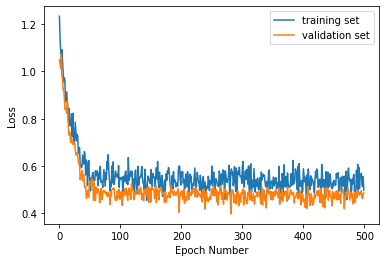

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label = 'training set')
plt.plot(hist.history['val_loss'], label = 'validation set')
plt.legend()

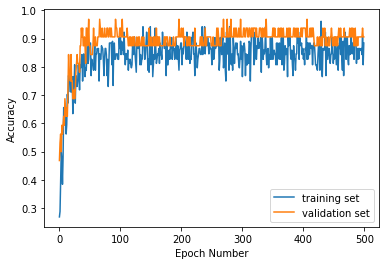

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label = 'training set')
plt.plot(hist.history['val_accuracy'], label = 'validation set')
plt.legend()

In [ ]:
class_map = train_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [ ]:
classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
## Load the model
from keras import models
saved_model = models.load_model('rice_leaf_vgg16.h5')

In [ ]:
from keras.utils import load_img, img_to_array

In [ ]:
def predict_image(filename, model):
    img_ = load_img(filename, target_size=(256, 256))
    img_array = img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size = 18, color='blue')
    plt.imshow(img_array)

1/1 [==============================] - 0s 412ms/step


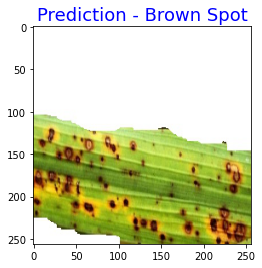

In [ ]:
predict_image('img2.jpg', saved_model)

**VGG19 Model**

In [ ]:
vgg_19 = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

80134624/80134624 [==============================] - 17s 0us/step


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

#lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1),
                               cooldown = 0,
                               patience = 5,
                               min_lr = 0.5e-6)

#num_epochs = 1000
#num_batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'rice_leaf_vgg19.h5', 
                               verbose=1, save_best_only=True)

callbacks = [checkpoint, lr_reducer]

start = datetime.now()

hist = model.fit(
                  train_set,
                  validation_data = val_set,
                  epochs = 300,
                  steps_per_epoch = STEP_SIZE_TRAIN,
                  validation_steps = STEP_SIZE_VALID,
                  callbacks = callbacks , verbose = 1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
2/2 [==============================] - ETA: 0s - loss: 1.2851 - accuracy: 0.2188 
Epoch 1: val_loss improved from inf to 1.10466, saving model to rice_leaf_vgg19.h5
2/2 [==============================] - 66s 40s/step - loss: 1.2851 - accuracy: 0.2188 - val_loss: 1.1047 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 2/300
2/2 [==============================] - ETA: 0s - loss: 1.1489 - accuracy: 0.3269 
Epoch 2: val_loss did not improve from 1.10466
2/2 [==============================] - 49s 36s/step - loss: 1.1489 - accuracy: 0.3269 - val_loss: 1.1096 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 3/300
2/2 [==============================] - ETA: 0s - loss: 1.1722 - accuracy: 0.3077 
Epoch 3: val_loss improved from 1.10466 to 1.03905, saving model to rice_leaf_vgg19.h5
2/2 [==============================] - 50s 38s/step - loss: 1.1722 - accuracy: 0.3077 - val_loss: 1.0390 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/300
2/2 [==============================] - ETA: 0s - loss:

Epoch 27/300
2/2 [==============================] - ETA: 0s - loss: 0.7901 - accuracy: 0.6250 
Epoch 27: val_loss improved from 0.72961 to 0.71667, saving model to rice_leaf_vgg19.h5
2/2 [==============================] - 54s 35s/step - loss: 0.7901 - accuracy: 0.6250 - val_loss: 0.7167 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 28/300
2/2 [==============================] - ETA: 0s - loss: 0.8222 - accuracy: 0.6731 
Epoch 28: val_loss did not improve from 0.71667
2/2 [==============================] - 51s 37s/step - loss: 0.8222 - accuracy: 0.6731 - val_loss: 0.7258 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 29/300
2/2 [==============================] - ETA: 0s - loss: 0.8199 - accuracy: 0.6875 
Epoch 29: val_loss did not improve from 0.71667
2/2 [==============================] - 58s 37s/step - loss: 0.8199 - accuracy: 0.6875 - val_loss: 0.7295 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 30/300
2/2 [==============================] - ETA: 0s - loss: 0.7617 - accuracy: 0.7500 
E

Epoch 54/300
2/2 [==============================] - ETA: 0s - loss: 0.6085 - accuracy: 0.8654 
Epoch 54: val_loss did not improve from 0.51708
2/2 [==============================] - 46s 28s/step - loss: 0.6085 - accuracy: 0.8654 - val_loss: 0.5392 - val_accuracy: 0.9062 - lr: 3.1623e-05
Epoch 55/300
2/2 [==============================] - ETA: 0s - loss: 0.6757 - accuracy: 0.7500 
Epoch 55: val_loss improved from 0.51708 to 0.51159, saving model to rice_leaf_vgg19.h5
2/2 [==============================] - 49s 30s/step - loss: 0.6757 - accuracy: 0.7500 - val_loss: 0.5116 - val_accuracy: 0.9375 - lr: 3.1623e-05
Epoch 56/300
2/2 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.7308 
Epoch 56: val_loss did not improve from 0.51159
2/2 [==============================] - 45s 34s/step - loss: 0.6490 - accuracy: 0.7308 - val_loss: 0.5689 - val_accuracy: 0.9062 - lr: 3.1623e-05
Epoch 57/300
2/2 [==============================] - ETA: 0s - loss: 0.6326 - accuracy: 0.7812 
E

2/2 [==============================] - 46s 34s/step - loss: 0.6422 - accuracy: 0.8269 - val_loss: 0.5805 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 111/300
2/2 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.7656 
Epoch 111: val_loss improved from 0.51159 to 0.50059, saving model to rice_leaf_vgg19.h5
2/2 [==============================] - 53s 35s/step - loss: 0.6567 - accuracy: 0.7656 - val_loss: 0.5006 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 112/300
2/2 [==============================] - ETA: 0s - loss: 0.6284 - accuracy: 0.7500 
Epoch 112: val_loss did not improve from 0.50059
2/2 [==============================] - 46s 35s/step - loss: 0.6284 - accuracy: 0.7500 - val_loss: 0.5774 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 113/300
2/2 [==============================] - ETA: 0s - loss: 0.6243 - accuracy: 0.8462 
Epoch 113: val_loss did not improve from 0.50059
2/2 [==============================] - 46s 29s/step - loss: 0.6243 - accuracy: 0.8462 - va

Epoch 139/300
2/2 [==============================] - ETA: 0s - loss: 0.5474 - accuracy: 0.8462 
Epoch 139: val_loss did not improve from 0.50059
2/2 [==============================] - 46s 34s/step - loss: 0.5474 - accuracy: 0.8462 - val_loss: 0.5330 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 140/300
2/2 [==============================] - ETA: 0s - loss: 0.6379 - accuracy: 0.8077 
Epoch 140: val_loss did not improve from 0.50059
2/2 [==============================] - 46s 28s/step - loss: 0.6379 - accuracy: 0.8077 - val_loss: 0.5482 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 141/300
2/2 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.7308 
Epoch 141: val_loss did not improve from 0.50059
2/2 [==============================] - 46s 28s/step - loss: 0.6966 - accuracy: 0.7308 - val_loss: 0.5479 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 142/300
2/2 [==============================] - ETA: 0s - loss: 0.6217 - accuracy: 0.7812 
Epoch 142: val_loss did not improv

2/2 [==============================] - ETA: 0s - loss: 0.6419 - accuracy: 0.8846 
Epoch 195: val_loss did not improve from 0.50059
2/2 [==============================] - 47s 35s/step - loss: 0.6419 - accuracy: 0.8846 - val_loss: 0.5530 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 196/300
2/2 [==============================] - ETA: 0s - loss: 0.6506 - accuracy: 0.7656 
Epoch 196: val_loss did not improve from 0.50059
2/2 [==============================] - 54s 35s/step - loss: 0.6506 - accuracy: 0.7656 - val_loss: 0.5744 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 197/300
2/2 [==============================] - ETA: 0s - loss: 0.6249 - accuracy: 0.8462 
Epoch 197: val_loss did not improve from 0.50059
2/2 [==============================] - 48s 36s/step - loss: 0.6249 - accuracy: 0.8462 - val_loss: 0.5347 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 198/300
2/2 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.7188 
Epoch 198: val_loss did not improve from 0.50059

2/2 [==============================] - ETA: 0s - loss: 0.5840 - accuracy: 0.8269 
Epoch 251: val_loss did not improve from 0.49497
2/2 [==============================] - 49s 36s/step - loss: 0.5840 - accuracy: 0.8269 - val_loss: 0.5734 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 252/300
2/2 [==============================] - ETA: 0s - loss: 0.6368 - accuracy: 0.7969 
Epoch 252: val_loss did not improve from 0.49497
2/2 [==============================] - 55s 35s/step - loss: 0.6368 - accuracy: 0.7969 - val_loss: 0.5650 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 253/300
2/2 [==============================] - ETA: 0s - loss: 0.6591 - accuracy: 0.7885 
Epoch 253: val_loss did not improve from 0.49497
2/2 [==============================] - 48s 36s/step - loss: 0.6591 - accuracy: 0.7885 - val_loss: 0.5838 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 254/300
2/2 [==============================] - ETA: 0s - loss: 0.6554 - accuracy: 0.7885 
Epoch 254: val_loss did not improve from 0.49497

### Checking the Test Accuracy

In [ ]:
score_VGG19 = model.evaluate(val_set)
print('Test Loss:', score_VGG19[0])
print('Test accuracy:', score_VGG19[1])

2/2 [==============================] - 23s 2s/step - loss: 0.5515 - accuracy: 0.8889
Test Loss: 0.5515003204345703
Test accuracy: 0.8888888955116272


In [ ]:
score_VGG19

[0.5515003204345703, 0.8888888955116272]

## Training Vs Validation Plot

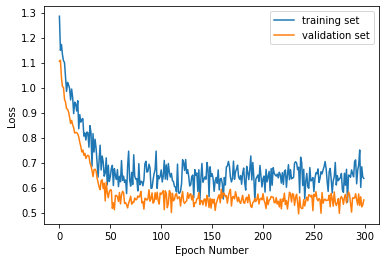

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label = 'training set')
plt.plot(hist.history['val_loss'], label = 'validation set')
plt.legend()

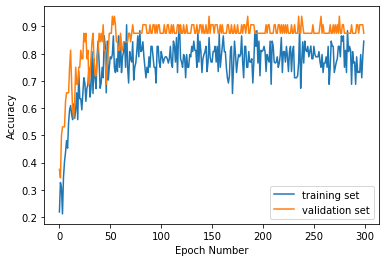

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label = 'training set')
plt.plot(hist.history['val_accuracy'], label = 'validation set')
plt.legend()

In [ ]:
class_map = train_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [ ]:
classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
## Load the model
from keras import models
saved_VGG19_model = models.load_model('rice_leaf_vgg19.h5')

In [ ]:
from keras.utils import load_img, img_to_array

In [ ]:
def predict_image(filename, model):
    img_ = load_img(filename, target_size=(256, 256))
    img_array = img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size = 18, color='blue')
    plt.imshow(img_array)

1/1 [==============================] - 1s 628ms/step


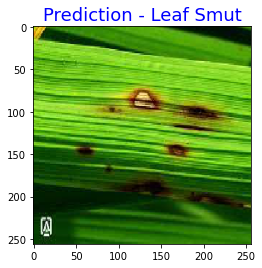

In [ ]:
predict_image('img3.jpg', saved_VGG19_model)

**Inception_V3**

In [ ]:
incep = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

87910968/87910968 [==============================] - 14s 0us/step


In [ ]:
# don't train existing weights
# this will exclude the initial layers from training phase as there are already been trained.
for layer in incep.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(incep.output)
prediction = Dense(len(folders), activation='softmax')(x) # adding the output layer with softmax function as this is a multi label classification problem.
model = Model(inputs=incep.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 29, 29, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 29, 29, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 29, 29, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 29, 29, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 29, 29, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 14, 14, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 14, 14, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 14, 14, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 14, 14, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 14, 14, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 14, 14, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 14, 14, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 6, 6, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 6, 6, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 6, 6, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

#lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1),
                               cooldown = 0,
                               patience = 5,
                               min_lr = 0.5e-6)

#num_epochs = 1000
#num_batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'rice_leaf_inception.h5', 
                               verbose=1, save_best_only=True)

callbacks = [checkpoint, lr_reducer]

start = datetime.now()

hist = model.fit(
                  train_set,
                  validation_data = val_set,
                  epochs = 400,
                  steps_per_epoch = STEP_SIZE_TRAIN,
                  validation_steps = STEP_SIZE_VALID,
                  callbacks = callbacks , verbose = 1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/400
2/2 [==============================] - ETA: 0s - loss: 1.6021 - accuracy: 0.3594  
Epoch 1: val_loss improved from inf to 1.45223, saving model to rice_leaf_inception.h5
2/2 [==============================] - 130s 31s/step - loss: 1.6021 - accuracy: 0.3594 - val_loss: 1.4522 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 2/400
2/2 [==============================] - ETA: 0s - loss: 1.2257 - accuracy: 0.4844 
Epoch 2: val_loss improved from 1.45223 to 0.83519, saving model to rice_leaf_inception.h5
2/2 [==============================] - 40s 23s/step - loss: 1.2257 - accuracy: 0.4844 - val_loss: 0.8352 - val_accuracy: 0.6562 - lr: 1.0000e-04
Epoch 3/400
2/2 [==============================] - ETA: 0s - loss: 1.0625 - accuracy: 0.5192 
Epoch 3: val_loss improved from 0.83519 to 0.69199, saving model to rice_leaf_inception.h5
2/2 [==============================] - 33s 17s/step - loss: 1.0625 - accuracy: 0.5192 - val_loss: 0.6920 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 4/400


2/2 [==============================] - 38s 21s/step - loss: 0.2531 - accuracy: 0.8906 - val_loss: 0.4448 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 57/400
2/2 [==============================] - ETA: 0s - loss: 0.1670 - accuracy: 0.9615 
Epoch 57: val_loss did not improve from 0.26785
2/2 [==============================] - 32s 16s/step - loss: 0.1670 - accuracy: 0.9615 - val_loss: 0.4424 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 58/400
2/2 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.8906 
Epoch 58: val_loss did not improve from 0.26785
2/2 [==============================] - 36s 20s/step - loss: 0.2369 - accuracy: 0.8906 - val_loss: 0.4142 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 59/400
2/2 [==============================] - ETA: 0s - loss: 0.2180 - accuracy: 0.9423 
Epoch 59: val_loss did not improve from 0.26785
2/2 [==============================] - 32s 20s/step - loss: 0.2180 - accuracy: 0.9423 - val_loss: 0.4595 - val_accuracy: 0.8438 - lr: 5.

Epoch 85/400
2/2 [==============================] - ETA: 0s - loss: 0.2019 - accuracy: 0.9231 
Epoch 85: val_loss did not improve from 0.26785
2/2 [==============================] - 33s 21s/step - loss: 0.2019 - accuracy: 0.9231 - val_loss: 0.3466 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 86/400
2/2 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9531 
Epoch 86: val_loss did not improve from 0.26785
2/2 [==============================] - 38s 21s/step - loss: 0.1959 - accuracy: 0.9531 - val_loss: 0.4557 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 87/400
2/2 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.9531 
Epoch 87: val_loss did not improve from 0.26785
2/2 [==============================] - 39s 21s/step - loss: 0.1823 - accuracy: 0.9531 - val_loss: 0.3063 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 88/400
2/2 [==============================] - ETA: 0s - loss: 0.1565 - accuracy: 0.9688 
Epoch 88: val_loss did not improve from 0

2/2 [==============================] - 31s 19s/step - loss: 0.1459 - accuracy: 0.9808 - val_loss: 0.4622 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 114/400
2/2 [==============================] - ETA: 0s - loss: 0.2053 - accuracy: 0.9423
Epoch 114: val_loss did not improve from 0.26785
2/2 [==============================] - 29s 20s/step - loss: 0.2053 - accuracy: 0.9423 - val_loss: 0.3376 - val_accuracy: 0.9062 - lr: 5.0000e-07
Epoch 115/400
2/2 [==============================] - ETA: 0s - loss: 0.1526 - accuracy: 0.9688 
Epoch 115: val_loss did not improve from 0.26785
2/2 [==============================] - 35s 20s/step - loss: 0.1526 - accuracy: 0.9688 - val_loss: 0.4466 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 116/400
2/2 [==============================] - ETA: 0s - loss: 0.2576 - accuracy: 0.9231 
Epoch 116: val_loss did not improve from 0.26785
2/2 [==============================] - 30s 20s/step - loss: 0.2576 - accuracy: 0.9231 - val_loss: 0.4432 - val_accuracy: 0.8438 - l

Epoch 142/400
2/2 [==============================] - ETA: 0s - loss: 0.2869 - accuracy: 0.8846 
Epoch 142: val_loss did not improve from 0.26785
2/2 [==============================] - 31s 20s/step - loss: 0.2869 - accuracy: 0.8846 - val_loss: 0.3264 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 143/400
2/2 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.9038 
Epoch 143: val_loss did not improve from 0.26785
2/2 [==============================] - 31s 20s/step - loss: 0.2531 - accuracy: 0.9038 - val_loss: 0.3838 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 144/400
2/2 [==============================] - ETA: 0s - loss: 0.2342 - accuracy: 0.9231 
Epoch 144: val_loss did not improve from 0.26785
2/2 [==============================] - 31s 15s/step - loss: 0.2342 - accuracy: 0.9231 - val_loss: 0.4396 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 145/400
2/2 [==============================] - ETA: 0s - loss: 0.1320 - accuracy: 0.9615
Epoch 145: val_loss did not improve

2/2 [==============================] - ETA: 0s - loss: 0.2061 - accuracy: 0.9219 
Epoch 198: val_loss did not improve from 0.26785
2/2 [==============================] - 40s 23s/step - loss: 0.2061 - accuracy: 0.9219 - val_loss: 0.4238 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 199/400
2/2 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9219 
Epoch 199: val_loss did not improve from 0.26785
2/2 [==============================] - 38s 21s/step - loss: 0.2139 - accuracy: 0.9219 - val_loss: 0.4607 - val_accuracy: 0.8125 - lr: 5.0000e-07
Epoch 200/400
2/2 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9038 
Epoch 200: val_loss did not improve from 0.26785
2/2 [==============================] - 32s 21s/step - loss: 0.2086 - accuracy: 0.9038 - val_loss: 0.2999 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 201/400
2/2 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.8906 
Epoch 201: val_loss did not improve from 0.26785

2/2 [==============================] - ETA: 0s - loss: 0.2188 - accuracy: 0.9038  
Epoch 254: val_loss did not improve from 0.26785
2/2 [==============================] - 104s 28s/step - loss: 0.2188 - accuracy: 0.9038 - val_loss: 0.3683 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 255/400
2/2 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.9231 
Epoch 255: val_loss did not improve from 0.26785
2/2 [==============================] - 53s 25s/step - loss: 0.2056 - accuracy: 0.9231 - val_loss: 0.3512 - val_accuracy: 0.8750 - lr: 5.0000e-07
Epoch 256/400
2/2 [==============================] - ETA: 0s - loss: 0.3416 - accuracy: 0.8654 
Epoch 256: val_loss did not improve from 0.26785
2/2 [==============================] - 42s 21s/step - loss: 0.3416 - accuracy: 0.8654 - val_loss: 0.4580 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 257/400
2/2 [==============================] - ETA: 0s - loss: 0.2057 - accuracy: 0.9423 
Epoch 257: val_loss did not improve from 0.267

Epoch 311/400
2/2 [==============================] - ETA: 0s - loss: 0.1783 - accuracy: 0.9423 
Epoch 311: val_loss did not improve from 0.26785
2/2 [==============================] - 38s 25s/step - loss: 0.1783 - accuracy: 0.9423 - val_loss: 0.4745 - val_accuracy: 0.8125 - lr: 5.0000e-07
Epoch 312/400
2/2 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.9231 
Epoch 312: val_loss did not improve from 0.26785
2/2 [==============================] - 45s 32s/step - loss: 0.2368 - accuracy: 0.9231 - val_loss: 0.4224 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 313/400
2/2 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.9038 
Epoch 313: val_loss did not improve from 0.26785
2/2 [==============================] - 46s 33s/step - loss: 0.2249 - accuracy: 0.9038 - val_loss: 0.3803 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 314/400
2/2 [==============================] - ETA: 0s - loss: 0.1077 - accuracy: 0.9808 
Epoch 314: val_loss did not improv

2/2 [==============================] - ETA: 0s - loss: 0.1555 - accuracy: 0.9423 
Epoch 367: val_loss did not improve from 0.26785
2/2 [==============================] - 42s 29s/step - loss: 0.1555 - accuracy: 0.9423 - val_loss: 0.4447 - val_accuracy: 0.8125 - lr: 5.0000e-07
Epoch 368/400
2/2 [==============================] - ETA: 0s - loss: 0.1650 - accuracy: 0.9615 
Epoch 368: val_loss did not improve from 0.26785
2/2 [==============================] - 42s 29s/step - loss: 0.1650 - accuracy: 0.9615 - val_loss: 0.4618 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 369/400
2/2 [==============================] - ETA: 0s - loss: 0.1873 - accuracy: 0.9615 
Epoch 369: val_loss did not improve from 0.26785
2/2 [==============================] - 46s 24s/step - loss: 0.1873 - accuracy: 0.9615 - val_loss: 0.4615 - val_accuracy: 0.8438 - lr: 5.0000e-07
Epoch 370/400
2/2 [==============================] - ETA: 0s - loss: 0.1753 - accuracy: 0.9615 
Epoch 370: val_loss did not improve from 0.26785

### Checking the Test Accuracy

In [ ]:
score_inception = model.evaluate(val_set)
print('Test Loss:', score_inception[0])
print('Test accuracy:', score_inception[1])

2/2 [==============================] - 8s 1s/step - loss: 0.4367 - accuracy: 0.8333
Test Loss: 0.436673641204834
Test accuracy: 0.8333333134651184


In [ ]:
score_inception

[0.436673641204834, 0.8333333134651184]

## Training Vs Validation Plot

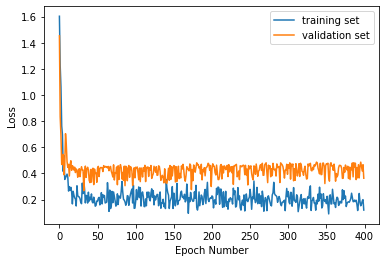

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label = 'training set')
plt.plot(hist.history['val_loss'], label = 'validation set')
plt.legend()

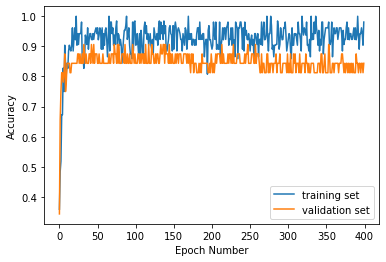

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label = 'training set')
plt.plot(hist.history['val_accuracy'], label = 'validation set')
plt.legend()

In [ ]:
class_map = train_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [ ]:
classes

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
## Load the model
from keras import models
saved_inception_model = models.load_model('rice_leaf_inception.h5')

In [ ]:
from keras.utils import load_img, img_to_array

In [ ]:
def predict_image(filename, model):
    img_ = load_img(filename, target_size=(256, 256))
    img_array = img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size = 18, color='blue')
    plt.imshow(img_array)

1/1 [==============================] - 1s 637ms/step


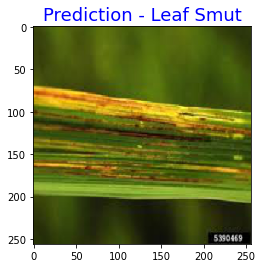

In [ ]:
predict_image('img4.jpg', saved_inception_model)

**SUMMARY**

CNN is an algorithm of deep learning techniques that has been successfully invoked for handling computer vision issues such as picture classification, object segmentation, and image analysis. CNN has been used to address the classification of Rice leaf diseases accurate detection and classification of rice leaf disease.

The dataset provided contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

**Classes**

* Leaf smut: small black linear lesions on leaf blades, leaf
tips may turn grey and dry.

* Bacterial blight: elongated lesions near the leaf tips and
margins, and turns white to yellow and then grey due to
fungal attack.

* Brown spot: dark brown colored and round to oval shaped
lesions on rice leaves


**METHODOLOGY FOLLOWED**

For the accurate detection and classification of rice leaf disease the CNN approach has been used where the images will go through preprocessing stages, where images will be subjected to background removal, resizing, and enhancement. Data augmentation is also performed to increase the size of the dataset. The data augmentation technique simply applies minor changes to the original images to produce new distinct images. The minor changes include rotation, scale-in/scale-out, and translation. Various methods such as CNN with ADAM and RMSprop optimizer, VGG16, VGG19 and Inception V3 have been studied for features extraction on the rice leaf disease. The feature reduction is performed using the flatten, dense, and softmax layers. The last layers of these algorithms perform the classification and evaluated using the accuracy metrices. 
The comparative study among these algorithms has been carried out for better representation and understanding of the accuracy of the model trained with different algorithms.


**INSIGHTS FROM VARIOUS CNN APPROACHS**

* In CNN method with the ADAM optimizer gave an accuracy of 86.11%.

* In CNN method with the RMSprop optimizer gave an accuracy of 75%.

Also, CNN with various transfer learning methods has been studied and their performance has been evaluated.

* The VGG16 gave an accuracy of 91.66%.
* The VGG19 gave an accuracy of 88.88%.
* The Inception V3 gave an accuracy of 83.33%

The VGG16 method has accurately classified the diseases and has given a better accuracy compared to other methods


**CONCLUSION**

CNN are widely regarded as the most successful technique for any prediction problem involving input image data. Various CNN methods with transfer learning approach have been studied for the classification of rice leaf diseases. Among these methods, VGG16 has accurately classified the diseases and has given a better accuracy compared to other methods.

**CHALLENGES FACED**

The major challenges of recognizing rice leaf diseases are the issue image quality and backgrounds. This condition has restricted the model performance. 
Also, there were only 40 images in each disease class which also affected our model performance.